In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### As checked This is a Regression Model based on the data structure

In [3]:
#Initializing the Dataframe
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/refs/heads/main/boston_house_rent.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [41]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [40]:
data.sample(n=9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00,21.1
211,0.37578,0.0,10.59,1,0.489,5.404,88.6,3.6650,4,277,18.6,395.24,23.98,19.3
361,3.83684,0.0,18.10,0,0.770,6.251,91.1,2.2955,24,666,20.2,350.65,14.19,19.9
345,0.03113,0.0,4.39,0,0.442,6.014,48.5,8.0136,3,352,18.8,385.64,10.53,17.5
82,0.03659,25.0,4.86,0,0.426,6.302,32.2,5.4007,4,281,19.0,396.90,6.72,24.8
410,51.13580,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
275,0.09604,40.0,6.41,0,0.447,6.854,42.8,4.2673,4,254,17.6,396.90,2.98,32.0
286,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,1,241,18.2,341.60,12.93,20.1


In [14]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [15]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
#finding the correlation between the features
corr = data.corr()

In [18]:
corr.shape

(14, 14)

In [19]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [20]:
#how to selecting the features 
    Heatmap
    Scatterplot
    Striplot

IndentationError: unexpected indent (2770768423.py, line 2)

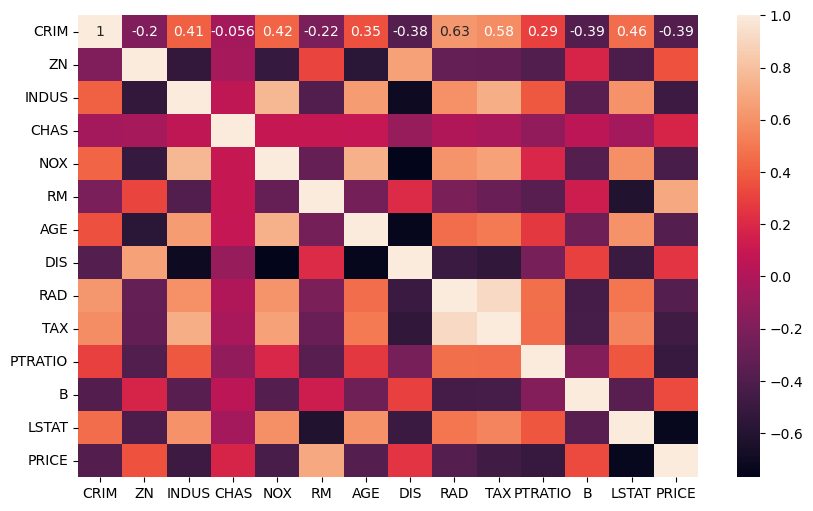

In [21]:
#plotting the heatmap of correlation between features
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.show()

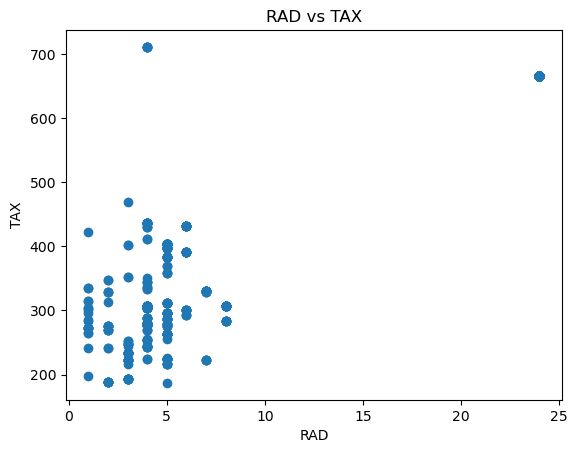

In [22]:
#seems RAD and TAX are correlated, lets check withscatter plot

plt.scatter(data.RAD, data.TAX)
plt.xlabel('RAD')
plt.ylabel('TAX')
plt.title('RAD vs TAX')
plt.show()

In [23]:
#as checked we cannot confirm with plot, there is not a close relationship , so we will not take risk and not deleting any feature

#so dividing the features and label
x = data.drop(columns=['PRICE'], axis=1)
y =data['PRICE']

In [50]:
#train test split(Hold Out Method)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=100)

### AdaBoost Model Building

In [51]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train) #training thee model

AdaBoostRegressor()

In [52]:
#model prediction on trained data
y_pred = ada.predict(x_train)

In [47]:
x_train #Just want to see how model works on the training data , How much undersatnd on my training data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
37,0.08014,0.0,5.96,0,0.499,5.850,41.5,3.9342,5,279,19.2,396.90,8.77
202,0.02177,82.5,2.03,0,0.415,7.610,15.7,6.2700,2,348,14.7,395.38,3.11
368,4.89822,0.0,18.10,0,0.631,4.970,100.0,1.3325,24,666,20.2,375.52,3.26
31,1.35472,0.0,8.14,0,0.538,6.072,100.0,4.1750,4,307,21.0,376.73,13.04
401,14.23620,0.0,18.10,0,0.693,6.343,100.0,1.5741,24,666,20.2,396.90,20.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.04297,52.5,5.32,0,0.405,6.565,22.9,7.3172,6,293,16.6,371.72,9.51
109,0.26363,0.0,8.56,0,0.520,6.229,91.2,2.5451,5,384,20.9,391.23,15.55
395,8.71675,0.0,18.10,0,0.693,6.471,98.8,1.7257,24,666,20.2,391.98,17.12
480,5.82401,0.0,18.10,0,0.532,6.242,64.7,3.4242,24,666,20.2,396.90,10.74


In [48]:
y_pred[:6] #for one role it will show something value, for 2nd value it will show something, row wise

array([22.03361345, 44.85714286, 47.19387755, 19.50731707, 12.66666667,
       30.84102564])

In [53]:
accuracy = metrics.r2_score(y_train,y_pred)
print('R2 Score', accuracy)

R2 Score 0.9090598048962251


In [55]:
#so model has already seen the data so it is producing better score
#preicting test data with the model
y_test_pred = ada.predict(x_test)

In [56]:
#model evaulation on test data
accuracy = metrics.r2_score(y_test,y_test_pred)
print('R2 Score', accuracy)

R2 Score 0.7954720499702994


In [61]:
#as checked there is room for improvement in test data but in train data we have trying to improve that acuracy
#using Randomized searchCV

from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':[47,50,60,70], 'learning_rate':[0.09,0.25,0.30]}
rnd_search=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)


In [64]:
rnd_search.fit(x_train,y_train)
rnd_search.best_estimator_

AdaBoostRegressor(learning_rate=0.3, n_estimators=60)

In [65]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)
print('===========Accuracy post Tuning')
print(metrics.r2_score(y_test,y_pred))

===========Accuracy post Tuning
0.8367328950687376
